In [1]:
%load_ext autoreload
import os,sys
import pandas as pd
import seaborn as sns
import numpy as np
sys.path.append("../")

print(sys.path)

%autoreload 2
from src.pySRM.pysrm.segment import IMZMLExtract, SpectraRegion, ProteinWeights



['/usr/lib/python36.zip', '/usr/lib/python3.6', '/usr/lib/python3.6/lib-dynload', '', '/home/mjoppich/.local/lib/python3.6/site-packages', '/home/mjoppich/.local/lib/python3.6/site-packages/mpld3-0.3.1.dev1-py3.6.egg', '/home/mjoppich/.local/lib/python3.6/site-packages/opennre-0.1-py3.6.egg', '/usr/local/lib/python3.6/dist-packages', '/usr/local/lib/python3.6/dist-packages/tf_unet-0.1.1-py3.6.egg', '/mnt/d/PythonCGI/jupyter_micropython_kernel', '/usr/lib/python3/dist-packages', '/usr/local/lib/python3.6/dist-packages/IPython/extensions', '/home/mjoppich/.ipython', '../']


/usr/local/lib/python3.6/dist-packages/numba/core/errors.py:144: UserWarning: Insufficiently recent colorama version found. Numba requires colorama >= 0.3.9
  warnings.warn(msg)


In [2]:
imze = IMZMLExtract("/mnt/d/dev/data/msi/slideD/181114_AT1_Slide_D_Proteins.imzML")
spectra = imze.get_region_array(1)
imze.normalize_region_array(spectra, normalize="max_intensity_region")


Opening regions file for /mnt/d/dev/data/msi/slideD/181114_AT1_Slide_D_Proteins.imzML
(43, 56, 17900)


In [3]:
print("Got spectra", spectra.shape)

Got spectra (43, 56, 17900)


In [4]:
spec = SpectraRegion(spectra, imze.mzValues)

In [5]:
spec.calculate_similarity(mode="spectra_log_dist")

2020-06-06 00:30:42,290  SpectraRegion  INFO: Creating C++ obj
2020-06-06 00:30:42,290  SpectraRegion  INFO: dimensions 17900
2020-06-06 00:30:42,292  SpectraRegion  INFO: input dimensions (43, 56, 17900)
2020-06-06 00:30:42,293  SpectraRegion  INFO: Switching to dot mode
2020-06-06 00:30:42,294  SpectraRegion  INFO: Starting calc similarity c++
2020-06-06 00:34:11,777  SpectraRegion  INFO: outclust dimensions (2408, 2408)
2020-06-06 00:34:11,797  SpectraRegion  INFO: Calculating spectra similarity
2020-06-06 00:34:11,953  SpectraRegion  INFO: Calculating spectra similarity done
2020-06-06 00:34:11,955  SpectraRegion  INFO: Calculating dist pixel map
2020-06-06 00:35:09,293  SpectraRegion  INFO: Calculating dist pixel map done


array([[0.94999999, 0.90955507, 0.87234817, ..., 0.87052201, 0.86727383,
        0.87526493],
       [0.90955507, 0.94999993, 0.92144208, ..., 0.9032565 , 0.91476463,
        0.91386631],
       [0.87234817, 0.92144208, 0.94999999, ..., 0.89966181, 0.91489907,
        0.91280817],
       ...,
       [0.87052201, 0.9032565 , 0.89966181, ..., 0.94999999, 0.92216961,
        0.92453853],
       [0.86727383, 0.91476463, 0.91489907, ..., 0.92216961, 0.94999999,
        0.9261732 ],
       [0.87526493, 0.91386631, 0.91280817, ..., 0.92453853, 0.9261732 ,
        0.94999999]])

In [6]:
res = spec.segment(method="WARD", number_of_regions=10)
res.shape

2020-06-06 00:35:09,464  SpectraRegion  INFO: Calculating clusters
2020-06-06 00:35:09,839  SpectraRegion  INFO: Calculating clusters done
2020-06-06 00:35:09,866  SpectraRegion  INFO: Calculating clusters saved


(43, 56)

In [7]:
spec.filter_clusters(method='remove_singleton')
spec.filter_clusters(method='merge_background')


2020-06-06 00:35:09,925  SpectraRegion  INFO: Assigning clusters to background: {4, 7, 8, 9, 10}


array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]], dtype=int16)

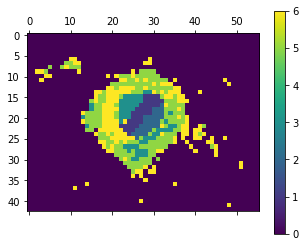

In [8]:
spec.plot_segments()

In [9]:
spec.consensus_spectra()

2020-06-06 00:35:10,267  SpectraRegion  INFO: Calculating consensus spectra
2020-06-06 00:35:10,339  SpectraRegion  INFO: Calculating consensus spectra done


{0: array([0.00476411, 0.00476411, 0.00476411, ..., 0.00238771, 0.00238771,
        0.00238771]),
 6: array([0.00539916, 0.00539916, 0.00539916, ..., 0.0022911 , 0.0022911 ,
        0.0022911 ]),
 5: array([0.00618143, 0.00618143, 0.00618143, ..., 0.00304021, 0.00304021,
        0.00304021]),
 3: array([0.00943015, 0.00943015, 0.00943015, ..., 0.00323914, 0.00323914,
        0.00323914]),
 1: array([0.00935569, 0.00935569, 0.00935569, ..., 0.00247208, 0.00247208,
        0.00247208]),
 2: array([0.02271133, 0.02271133, 0.02271133, ..., 0.00441103, 0.00441103,
        0.00441103])}

In [10]:
spec.consensus_similarity()

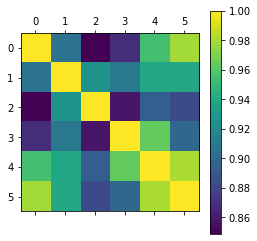

In [12]:
spec.plot_consensus_similarity()

In [ ]:
spec.plot_consensus_similarity(mode="spectra")

In [ ]:
#spec.plot_inter_consensus_similarity()

# Differential Analysis

2020-06-06 00:40:20,707  SpectraRegion  INFO: Processing Mass 8613 with best existing mass 8613.091734057309
I0606 00:40:20.707744 140247526803264 segment.py:127] Processing Mass 8613 with best existing mass 8613.091734057309


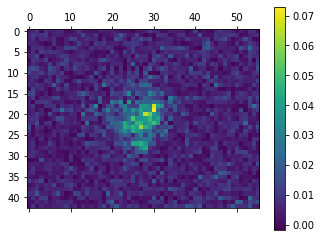

In [17]:
spec.mass_heatmap(8613)

In [ ]:
dfobj = spec.mass_dabest(12504)

In [13]:
pw = ProteinWeights("protein_weights.tsv")

In [14]:
markerGenes = spec.find_all_markers(pw)
markerGenes

2020-06-06 00:37:37,725  SpectraRegion  INFO: DE data for case: [0]
2020-06-06 00:37:37,728  SpectraRegion  INFO: DE data for control: [6, 5, 3, 1, 2]
2020-06-06 00:37:37,729  SpectraRegion  INFO: DE result key: ((0,), (6, 5, 3, 1, 2))
2020-06-06 00:37:37,767  SpectraRegion  INFO: Processing cluster: 0
2020-06-06 00:37:48,013  SpectraRegion  INFO: Processing cluster: 6
2020-06-06 00:37:49,040  SpectraRegion  INFO: Processing cluster: 5
2020-06-06 00:37:51,143  SpectraRegion  INFO: Processing cluster: 3
2020-06-06 00:37:52,243  SpectraRegion  INFO: Processing cluster: 1
2020-06-06 00:37:52,283  SpectraRegion  INFO: Processing cluster: 2
2020-06-06 00:37:53,381  SpectraRegion  INFO: DE DataFrame ready. Shape (17900, 2408)
2020-06-06 00:37:53,386  SpectraRegion  INFO: DE Sample DataFrame ready. Shape (2408, 3)
2020-06-06 00:37:53,398  SpectraRegion  INFO: NO outdirectory given. Performing DE-test
/usr/local/lib/python3.6/dist-packages/tensorflow/python/framework/dtypes.py:516: FutureWarni

,clusterID,gene_ident,gene_mass,gene,protein_mass,avg_logFC,qvalue,num,anum,mean,median
0,0,mass_5679_336767354966,5679.336767,Tmsb4x,5679.4,1.025708,2.329821e-77,1923,1923,0.020571,0.019660
1,0,mass_5680_84590056829,5680.845901,Tmsb4x,5679.4,1.023538,1.278469e-71,1923,1913,0.016069,0.015362
2,0,mass_5682_355033781614,5682.355034,Tmsb4x,5679.4,1.028423,8.784201e-65,1923,1897,0.012620,0.011685
3,0,mass_8613_091734057309,8613.091734,Hsbp1,8610.7,1.241717,2.186162e-37,1923,1820,0.005949,0.005499
4,0,mass_9298_238212906519,9298.238213,Coa6,9298.3,1.015952,5.524515e-165,1923,1923,0.055750,0.053718
5,0,mass_9299_747346119842,9299.747346,Coa6,9298.3,1.032448,9.539782e-163,1923,1923,0.045741,0.044074
6,0,mass_9301_256479333168,9301.256479,Coa6,9298.3,1.038084,5.679950e-160,1923,1923,0.036646,0.035242
7,0,mass_14048_98956845126,14048.989568,Sncb,14051.0,1.029217,1.013602e-73,1923,1923,0.066150,0.061649
8,0,mass_14050_498701664585,14050.498702,Sncb,14051.0,1.057100,6.312587e-77,1923,1923,0.061613,0.057526
9,0,mass_14052_007834877908,14052.007835,Sncb,14051.0,1.070351,2.070649e-78,1923,1923,0.057601,0.053623


In [15]:
spec.list_de_results()

[((0,), (6, 5, 3, 1, 2)),
 ((6,), (0, 5, 3, 1, 2)),
 ((5,), (0, 6, 3, 1, 2)),
 ((3,), (0, 6, 5, 1, 2)),
 ((1,), (0, 6, 5, 3, 2)),
 ((2,), (0, 6, 5, 3, 1))]

In [16]:
markerGenes.to_csv("marker_genes.tsv", sep="\t", index=False)

2020-06-06 00:41:57,016  SpectraRegion  INFO: Processing Mass 24581 with best existing mass 24581.230264241207
I0606 00:41:57.016220 140247526803264 segment.py:127] Processing Mass 24581 with best existing mass 24581.230264241207


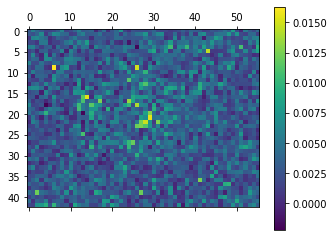

In [20]:
spec.mass_heatmap(24581)

In [ ]:
spec.idx2mass.index(2997.60704728)

In [ ]:
deRes = spec.get_de_result( ((7,), (0, 9, 10, 8, 6)) )

In [ ]:
deRes.plot_volcano(corrected_pval=True, min_fc=1)